### Figure 3 (Journal of Climate submission; Molina et al.)

Global annual mean surface temperature ($^{\circ}$C) of the CESM1 control, Global and Pacific experiments, and the Pacific Salt experiment, as indicated in the legend.

**Figure by: Maria J. Molina, NCAR**

In [1]:
# imports

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cftime
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib as mpl
import matplotlib.colors as colorss
from datetime import timedelta

In [2]:
from config import directory_figs, directory_data

In [3]:
# list of filenames to do this for:

# SSTs
file_g02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG02Sv.cam.h0.TS.*.nc'
file_g04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG04Sv.cam.h0.TS.*.nc'
file_p02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP02Sv.cam.h0.TS.*.nc'
file_p04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP04Sv.cam.h0.TS.*.nc'
file_psalt = 'b.e11.B1850LENS.f09_g16.FWPaSalP04Sv.cam.h0.TS.*.nc'
file_cntrl = 'b.e11.B1850C5CN.f09_g16.005.cam.h0.TS.*.nc'

In [4]:
# open file
ds_g02sv = xr.open_mfdataset(f'{directory_data}{file_g02sv}', combine='by_coords')
# fix time coords
ds_g02sv = ds_g02sv.assign_coords(time=ds_g02sv.coords['time'] - timedelta(days=17))
# create time series
ds_g02sv = ds_g02sv['TS'].resample(time='AS').mean(skipna=True).mean(dim=['lat','lon'],skipna=True)-273.15

ds_g04sv = xr.open_mfdataset(f'{directory_data}{file_g04sv}', combine='by_coords')
ds_g04sv = ds_g04sv.assign_coords(time=ds_g04sv.coords['time'] - timedelta(days=17))
ds_g04sv = ds_g04sv['TS'].resample(time='AS').mean(skipna=True).mean(dim=['lat','lon'],skipna=True)-273.15

ds_p02sv = xr.open_mfdataset(f'{directory_data}{file_p02sv}', combine='by_coords')
ds_p02sv = ds_p02sv.assign_coords(time=ds_p02sv.coords['time'] - timedelta(days=17))
ds_p02sv = ds_p02sv['TS'].resample(time='AS').mean(skipna=True).mean(dim=['lat','lon'],skipna=True)-273.15

ds_p04sv = xr.open_mfdataset(f'{directory_data}{file_p04sv}', combine='by_coords')
ds_p04sv = ds_p04sv.assign_coords(time=ds_p04sv.coords['time'] - timedelta(days=17))
ds_p04sv = ds_p04sv['TS'].resample(time='AS').mean(skipna=True).mean(dim=['lat','lon'],skipna=True)-273.15

ds_psalt = xr.open_mfdataset(f'{directory_data}{file_psalt}', combine='by_coords')
ds_psalt = ds_psalt.assign_coords(time=ds_psalt.coords['time'] - timedelta(days=17))
ds_psalt = ds_psalt['TS'].resample(time='AS').mean(skipna=True).mean(dim=['lat','lon'],skipna=True)-273.15

ds_cntrl = xr.open_mfdataset(f'{directory_data}{file_cntrl}', combine='by_coords')
ds_cntrl = ds_cntrl.assign_coords(time=ds_cntrl.coords['time'] - timedelta(days=17))
ds_cntrl = ds_cntrl['TS'].sel(time=slice(cftime.DatetimeNoLeap(
    800, 1, 1, 0, 0),cftime.DatetimeNoLeap(1599, 12, 31, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['lat','lon'],skipna=True)-273.15

In [5]:
ds_g02sv = ds_g02sv.isel(time=slice(0,800)).values
ds_g04sv = ds_g04sv.isel(time=slice(0,800)).values
ds_p02sv = ds_p02sv.isel(time=slice(0,800)).values
ds_p04sv = ds_p04sv.isel(time=slice(0,800)).values
ds_psalt = ds_psalt.values
ds_cntrl = ds_cntrl.isel(time=slice(0,800)).values

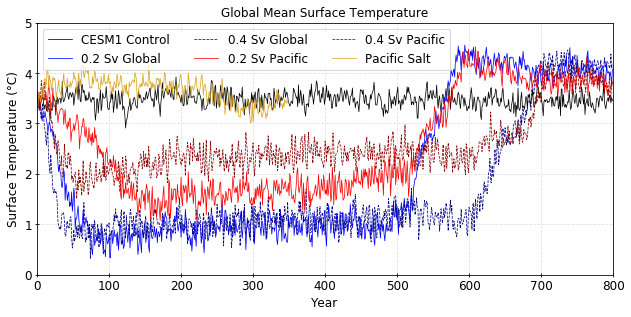

In [6]:
# -------------- create figure

a = u"\u00b0"

fig = plt.figure(figsize=(8,3.5))

# --------------

ax1 = plt.axes([0., 0., 1., 1.])

ax1.set_title('Global Mean Surface Temperature', fontsize=12)

l1, = ax1.plot(ds_cntrl, c='k', alpha=1.0, lw=0.75, zorder=2)
l2, = ax1.plot(ds_g02sv, c='blue', alpha=1.0, lw=0.75, zorder=2)
l3, = ax1.plot(ds_g04sv, c='navy', alpha=1.0, ls='--', lw=0.75, zorder=2)
l4, = ax1.plot(ds_p02sv, c='red', alpha=1.0, lw=0.75, zorder=2)
l5, = ax1.plot(ds_p04sv, c='darkred', alpha=1.0, ls='--', lw=0.75, zorder=2)
l6, = ax1.plot(ds_psalt, c='goldenrod', alpha=1.0, lw=0.75, zorder=2)

ax1.margins(x=0)
ax1.set_xlim([0,800])
ax1.set_ylim([0,5])

ax1.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=True, labelsize=12)
ax1.grid(alpha=0.4, ls='--')

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel(r'Surface Temperature ('+a+'C)', fontsize=12)

ax1.legend([l1,l2,l3,l4,l5,l6], 
           ['CESM1 Control', 
            '0.2 Sv Global',
            '0.4 Sv Global',
            '0.2 Sv Pacific',
            '0.4 Sv Pacific',
            'Pacific Salt'], 
            fontsize=12, ncol=3, loc='upper left')

# --------------

plt.savefig(f'{directory_figs}amocenso_fig3.png', bbox_inches='tight', dpi=200)
plt.show()

# --------------